In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import os
from datetime import datetime



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | vallenar
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | bodo
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | kutulik
Processing Record 8 of Set 1 | gunjur
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | tsiombe
Processing Record 13 of Set 1 | mineiros
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | mwingi
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | lihue
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | tik

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.count()


City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [27]:
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,47.28,87,4,5.10,CL,2024-05-11 01:59:42
1,Port-Aux-Francais,-49.3500,70.2167,41.22,71,7,31.12,TF,2024-05-11 01:59:42
2,Vallenar,-28.5708,-70.7581,53.58,75,100,2.73,CL,2024-05-11 01:59:42
3,Puerto Natales,-51.7236,-72.4875,29.44,92,100,3.24,CL,2024-05-11 01:59:42
4,Bodo,67.2800,14.4050,39.24,89,0,12.66,NO,2024-05-11 01:59:42
5,Ribeira Grande,38.5167,-28.7000,64.78,94,98,10.00,PT,2024-05-11 01:59:42
6,Kutulik,53.3508,102.7839,56.62,37,54,12.97,RU,2024-05-11 01:59:42
7,Gunjur,13.2019,-16.7339,75.27,83,0,5.75,GM,2024-05-11 01:59:42
8,Albany,42.6001,-73.9662,51.80,84,100,1.81,US,2024-05-11 01:59:42
9,Ushuaia,-54.8000,-68.3000,33.46,80,0,10.36,AR,2024-05-11 01:55:17


In [28]:
output_dir = "data/output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
city_data_df.to_csv("data/output_data/cities.csv", index_label="City_ID")

In [29]:
city_data_df = pd.read_csv("data/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Lebu,-37.6167,-73.6500,47.28,87,4,5.10,CL,2024-05-11 01:59:42
1,Port-Aux-Francais,-49.3500,70.2167,41.22,71,7,31.12,TF,2024-05-11 01:59:42
2,Vallenar,-28.5708,-70.7581,53.58,75,100,2.73,CL,2024-05-11 01:59:42
3,Puerto Natales,-51.7236,-72.4875,29.44,92,100,3.24,CL,2024-05-11 01:59:42
4,Bodo,67.2800,14.4050,39.24,89,0,12.66,NO,2024-05-11 01:59:42


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

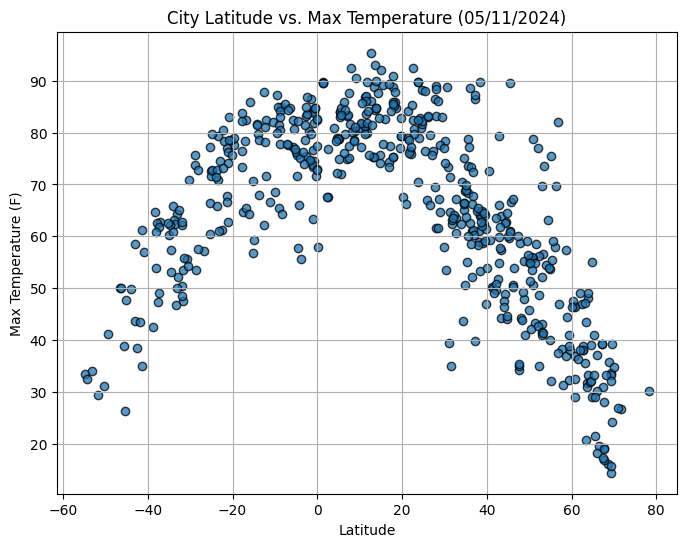

In [34]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (05/11/2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the plot as a PNG file
plt.savefig("data/img/latitude_vs_temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

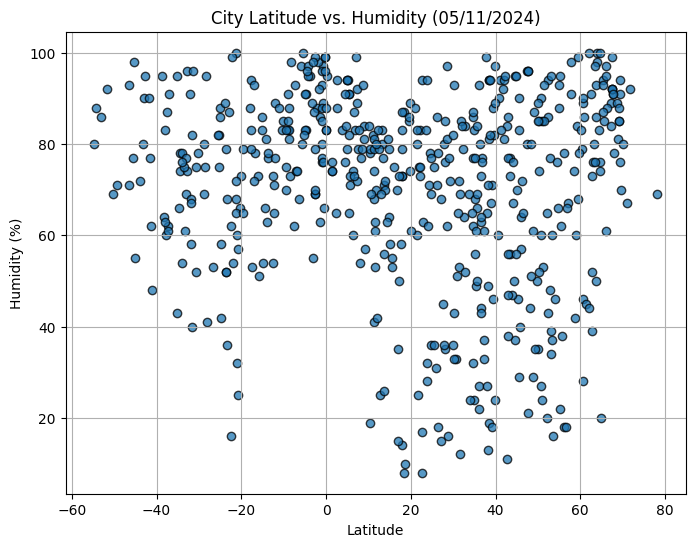

In [36]:
# Build scatter plot for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (05/11/2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the plot as a PNG file
plt.savefig("data/img/latitude_vs_humidity.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

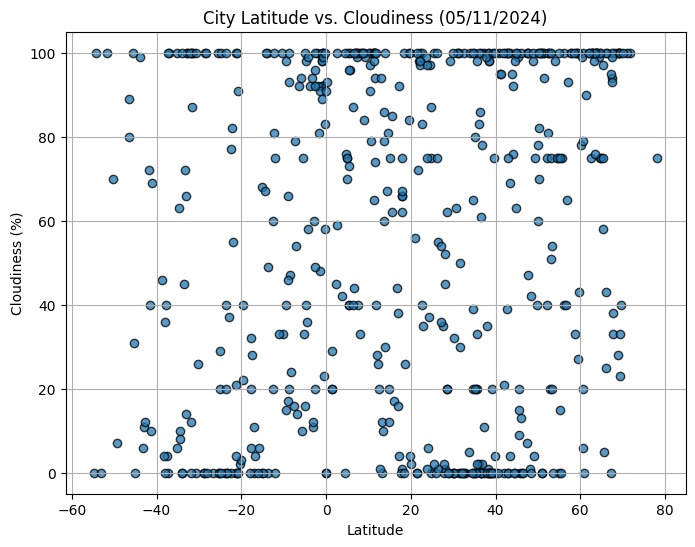

In [37]:
# Build scatter plot for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (05/11/2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the plot as a PNG file
plt.savefig("data/img/latitude_vs_cloudiness.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

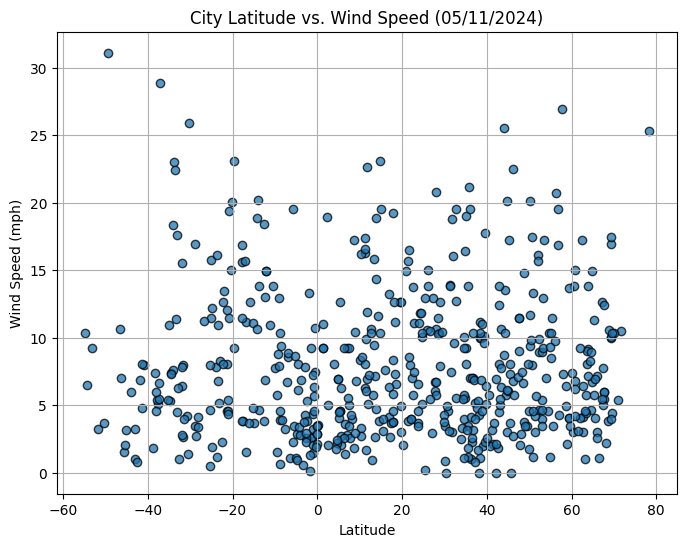

In [38]:
# Build scatter plot for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (05/11/2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the plot as a PNG file
plt.savefig("data/img/latitude_vs_wind_speed.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: 0.16414239883086512


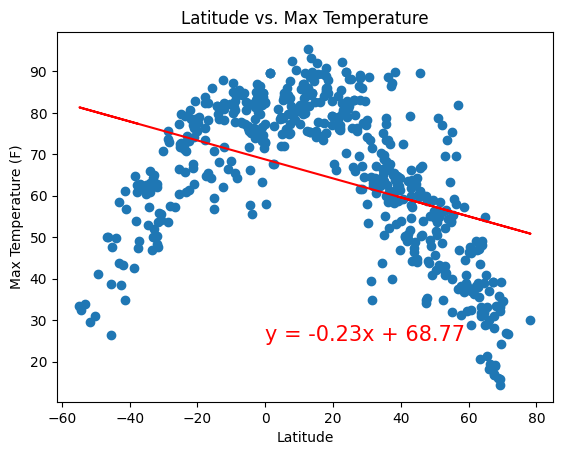

The r-value is: 0.011000948563467325


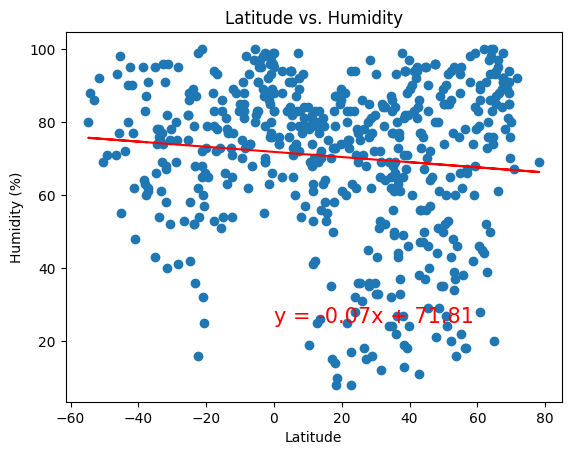

The r-value is: 0.024831456268370085


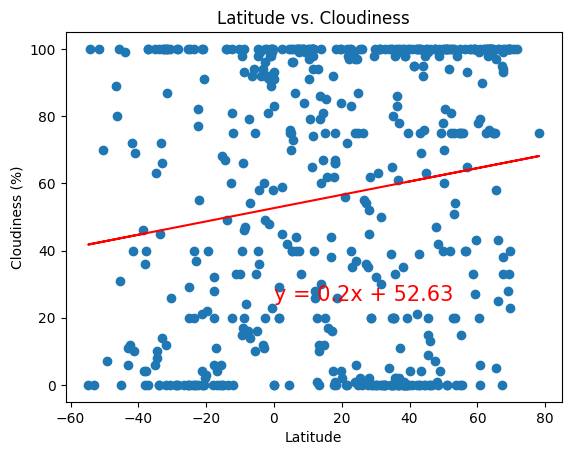

The r-value is: 1.6278357734135946e-05


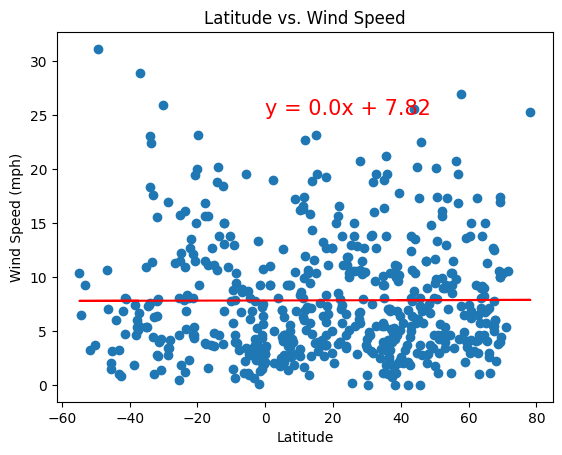

In [42]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the linear regression
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print r-value
    print(f"The r-value is: {rvalue**2}")
    
    # Show plot
    plt.show()

# Linear regression plots for each relationship
plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (F)", "Latitude vs. Max Temperature", (0, 25))
plot_linear_regression(city_data_df["Lat"], city_data_df["Humidity"], "Latitude", "Humidity (%)", "Latitude vs. Humidity", (0, 25))
plot_linear_regression(city_data_df["Lat"], city_data_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Latitude vs. Cloudiness", (0, 25))
plot_linear_regression(city_data_df["Lat"], city_data_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Latitude vs. Wind Speed", (0, 25))



NORTHERN HEMISPHERE CITIES


In [43]:
# Filter data for Northern Hemisphere (latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display the Northern Hemisphere DataFrame
northern_hemisphere_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,Bodo,67.2800,14.4050,39.24,89,0,12.66,NO,2024-05-11 01:59:42
5,Ribeira Grande,38.5167,-28.7000,64.78,94,98,10.00,PT,2024-05-11 01:59:42
6,Kutulik,53.3508,102.7839,56.62,37,54,12.97,RU,2024-05-11 01:59:42
7,Gunjur,13.2019,-16.7339,75.27,83,0,5.75,GM,2024-05-11 01:59:42
8,Albany,42.6001,-73.9662,51.80,84,100,1.81,US,2024-05-11 01:59:42


SOUTHERN HEMISPHERE CITIES

In [44]:
# Filter data for Southern Hemisphere (latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Display the Southern Hemisphere DataFrame
southern_hemisphere_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Lebu,-37.6167,-73.6500,47.28,87,4,5.10,CL,2024-05-11 01:59:42
1,Port-Aux-Francais,-49.3500,70.2167,41.22,71,7,31.12,TF,2024-05-11 01:59:42
2,Vallenar,-28.5708,-70.7581,53.58,75,100,2.73,CL,2024-05-11 01:59:42
3,Puerto Natales,-51.7236,-72.4875,29.44,92,100,3.24,CL,2024-05-11 01:59:42
9,Ushuaia,-54.8000,-68.3000,33.46,80,0,10.36,AR,2024-05-11 01:55:17


The r-value for Northern Hemisphere is: 0.7150969225450269


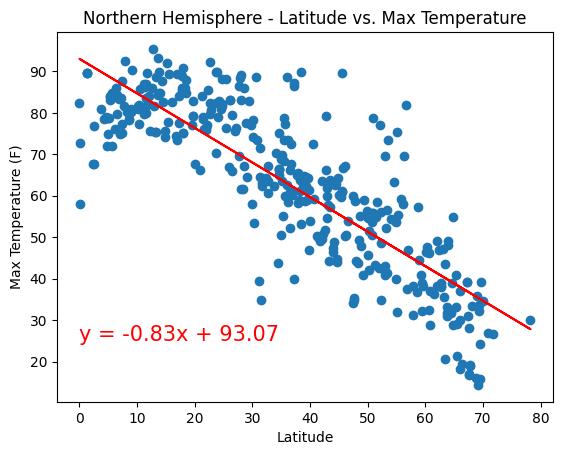

The r-value for Northern Hemisphere is: 0.0021381870327243893


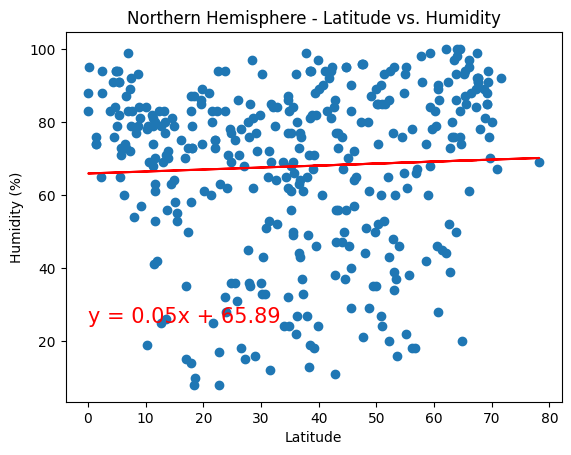

The r-value for Northern Hemisphere is: 0.007408940494567554


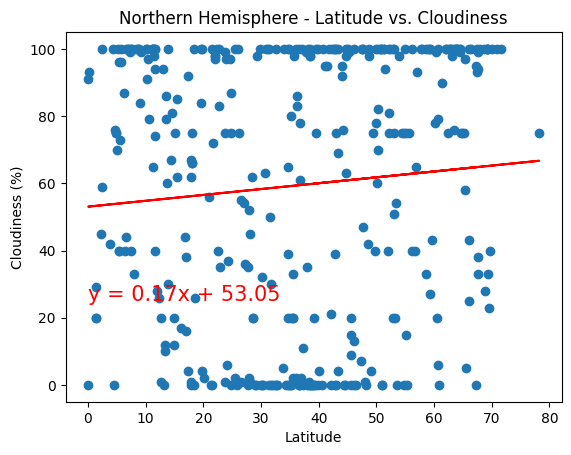

The r-value for Northern Hemisphere is: 0.0019272184079745297


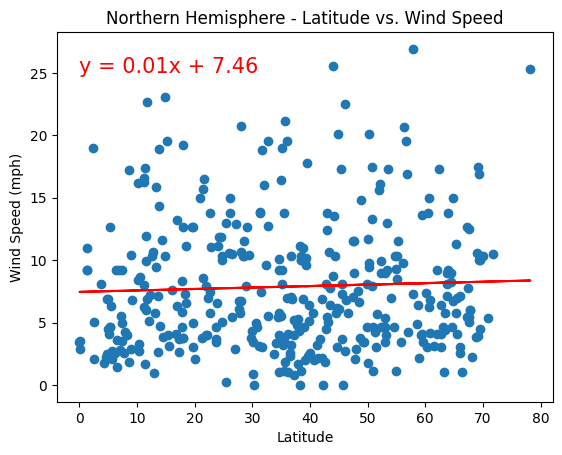

The r-value for Southern Hemisphere is: 0.6373265126302404


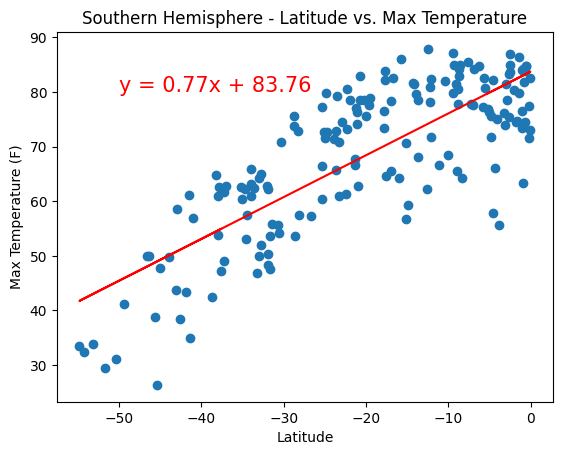

The r-value for Southern Hemisphere is: 0.046909134951722366


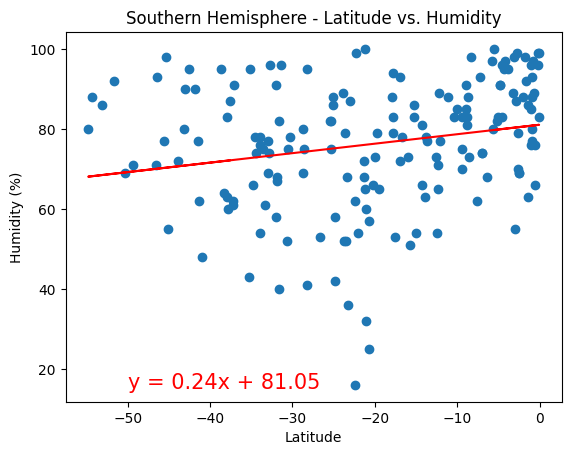

The r-value for Southern Hemisphere is: 0.03796786370589983


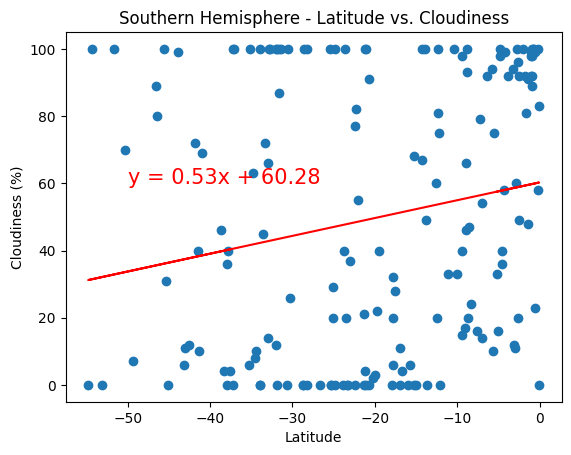

The r-value for Southern Hemisphere is: 0.021885136013582017


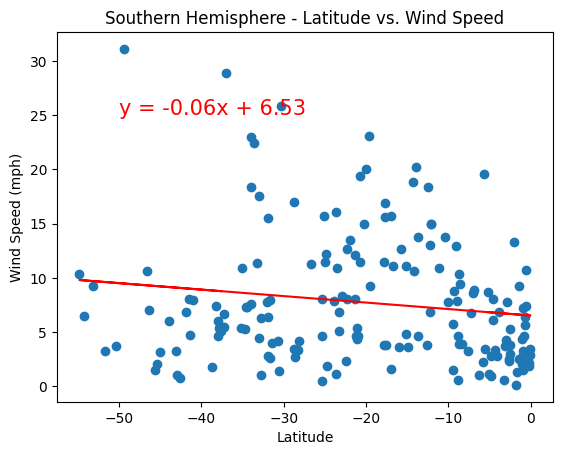

In [45]:
from scipy.stats import linregress

# Define a function to calculate linear regression and plot the data
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the linear regression
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print r-value
    print(f"The r-value for {hemisphere} Hemisphere is: {rvalue**2}")
    
    # Show plot
    plt.show()

# Perform linear regression and plot for each weather parameter in Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], "Latitude", "Max Temperature (F)", "Northern", "Northern Hemisphere - Latitude vs. Max Temperature", (0, 25))
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], "Latitude", "Humidity (%)", "Northern", "Northern Hemisphere - Latitude vs. Humidity", (0, 25))
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern", "Northern Hemisphere - Latitude vs. Cloudiness", (0, 25))
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Northern", "Northern Hemisphere - Latitude vs. Wind Speed", (0, 25))

# Perform linear regression and plot for each weather parameter in Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], "Latitude", "Max Temperature (F)", "Southern", "Southern Hemisphere - Latitude vs. Max Temperature", (-50, 80))
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], "Latitude", "Humidity (%)", "Southern", "Southern Hemisphere - Latitude vs. Humidity", (-50, 15))
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern", "Southern Hemisphere - Latitude vs. Cloudiness", (-50, 60))
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Southern", "Southern Hemisphere - Latitude vs. Wind Speed", (-50, 25))


HEMISPHERE LINEAR RELATIONSHIP FINDINGDS